# Data Visualisation & Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt

--2022-01-13 05:29:38--  https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt [following]
--2022-01-13 05:29:39--  https://www.dropbox.com/s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucea7e92a2bc1f97bfcab359635f.dl.dropboxusercontent.com/cd/0/inline/Bdqt0z-no1lCrkpotFeyVA9MbHEN-8t_KAIJZBNPRhJuIf6txswH_wdkwB1RBUCxCRPndXwWnDn38ErpgReEAlxZcEgTStJMQkhHi6kqSEchWqrFRooc3MQrNN-N32NM3PDdiEVrUkCDq8yuCvpYFlSV/file# [following]
--2022-01-13 05:29:39--  https://ucea7e92a2bc1f97bfcab359635f.dl.dropboxusercontent.com/cd/0/inline/Bdqt0z-no1lCrkpotFeyVA9MbHEN-8t_KAIJZBNPRhJuIf6txswH_wdkwB1RBUC

In [3]:
%cd /content/
#df = pd.read_csv('/content/gdrive/MyDrive/dlku/NTP2015fire-Jan.txt', sep='\t', header=None)
df = pd.read_csv('NTP2015-2017fire.txt', sep='\t', header=None)
df.columns = ["date", "station", "addr1", "addr2", "longitude", "latitude", "township"]

/content


In [4]:
df

,date,station,addr1,addr2,longitude,latitude,township
0,2015/1/1 0:13,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015/1/1 0:16,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015/1/1 0:48,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015/1/1 0:56,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015/1/1 1:04,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017/12/31 17:14,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017/12/31 18:40,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017/12/31 20:09,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017/12/31 20:44,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [5]:
#set date time format
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

In [6]:
df

,date,station,addr1,addr2,longitude,latitude,township
0,2015-01-01 00:13:00,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015-01-01 00:16:00,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015-01-01 00:48:00,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015-01-01 00:56:00,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015-01-01 01:04:00,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017-12-31 17:14:00,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017-12-31 18:40:00,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017-12-31 20:09:00,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017-12-31 20:44:00,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [7]:
#extract only numerical/quantitative data
dften = df[["date", "longitude", "latitude"]]

In [8]:
dften

,date,longitude,latitude
0,2015-01-01 00:13:00,121.466281,25.000569
1,2015-01-01 00:16:00,121.491579,25.084172
2,2015-01-01 00:48:00,121.460224,25.136422
3,2015-01-01 00:56:00,121.450333,25.031506
4,2015-01-01 01:04:00,121.420005,24.982273
...,...,...,...
24085,2017-12-31 17:14:00,121.493909,24.990417
24086,2017-12-31 18:40:00,121.621682,25.048063
24087,2017-12-31 20:09:00,121.490806,25.076529
24088,2017-12-31 20:44:00,121.519391,24.997367


In [9]:
BBox = ((dften.longitude.min(),   dften.longitude.max(),      
         dften.latitude.min(), dften.latitude.max()))

In [10]:
#Print out the coordinates, and go to Openstreetmap website to draw a map.
BBox

(121.2868855, 122.0030709, 24.77511693, 25.29717505)

(24.77511693, 25.29717505)

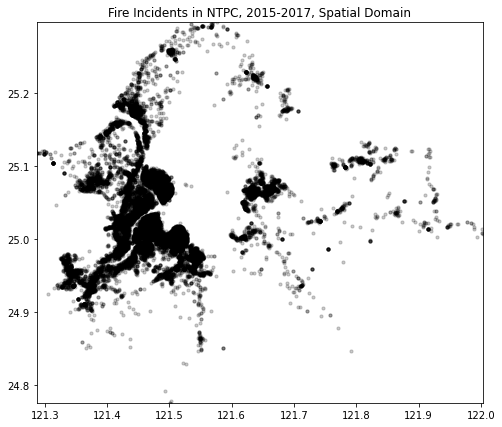

In [11]:
#let's plot the points
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(dften.longitude, dften.latitude, zorder=1, alpha= 0.2, c='k', s=10)
ax.set_title('Fire Incidents in NTPC, 2015-2017, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

In [12]:
#split dataframe into 3 years
df15 = df[df['date'].dt.year == 2015]
df16 = df[df['date'].dt.year == 2016]
df17 = df[df['date'].dt.year == 2017]

In [13]:
df15

,date,station,addr1,addr2,longitude,latitude,township
0,2015-01-01 00:13:00,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015-01-01 00:16:00,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015-01-01 00:48:00,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015-01-01 00:56:00,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015-01-01 01:04:00,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
9054,2015-12-31 21:41:00,火警-透天厝,新北市中和區大勇街25巷後面,新北市中和區大勇街29巷23弄2號,121.515367,24.994490,中和區秀明里
9055,2015-12-31 21:46:00,火警-集合住宅,新北市樹林區三福街29號;3樓,新北市樹林區三福街29號,121.408602,25.016660,樹林區三福里
9056,2015-12-31 22:37:00,火警-查看案件,新北市林口區麗園一街 派出所後 公園,新北市林口區麗園一街11巷11號,121.378654,25.070749,林口區東勢里
9057,2015-12-31 22:45:00,火警-查看案件,新北市蘆洲區中正路508巷 抽水站後,新北市蘆洲區中正路516巷10號,121.462377,25.097674,蘆洲區保新里


In [14]:
df16

,date,station,addr1,addr2,longitude,latitude,township
9059,2016-01-01 01:10:00,火警-查看案件,新北市泰山區明志路二段298巷18號之3,新北市泰山區明志路二段254巷10號,121.426283,25.047863,泰山區明志里
9060,2016-01-01 01:18:00,火警-查看案件,新北市淡水區 油車口 公園 黑店,新北市淡水區中正東路二段88巷41弄18號,121.458573,25.145268,淡水區八勢里
9061,2016-01-01 01:27:00,火警-查看案件,新北市永和區中正橋 河濱公園 白線015電塔,新北市永和區保福路二段129號,121.509767,25.013844,永和區下溪里
9062,2016-01-01 03:30:00,火警-查看案件,新北市蘆洲區三民路605號3樓,新北市蘆洲區三民路605號,121.460724,25.093751,蘆洲區南港里
9063,2016-01-01 03:47:00,火警-汽車,新北市樹林區 樹仁家商,新北市樹林區大安路216號,121.419350,24.994834,樹林區潭底里
...,...,...,...,...,...,...,...
17156,2016-12-31 19:50:00,火警-集合住宅,新北市板橋區長江路二段207號;14樓,新北市板橋區長江路二段207號,121.467488,25.032542,板橋區溪頭里
17157,2016-12-31 21:51:00,火警-查看案件,新北市板橋區 溪崑國中,新北市板橋區大觀路三段50巷30號,121.431403,24.997751,板橋區崑崙里
17158,2016-12-31 22:30:00,火警-集合住宅,新北市板橋區漢生東路23巷56弄7號;2樓 後棟,新北市板橋區漢生東路23巷56弄7號,121.466328,25.018254,板橋區新民里
17159,2016-12-31 22:52:00,火警-查看案件,新北市林口區東湖 東湖公園,新北市林口區興林一街109巷10號,121.392091,25.072460,林口區西林里


In [15]:
df17

,date,station,addr1,addr2,longitude,latitude,township
17161,2017-01-01 00:13:00,火警-山林田野(平地),新北市鶯歌區 三鶯藝術文化中,新北市鶯歌區環河路175號之8,121.346366,24.936866,鶯歌區二甲里
17162,2017-01-01 00:15:00,火警-集合住宅,新北市三峽區大同路 介壽國小,新北市三峽區永安街7號,121.377841,24.929874,三峽區介壽里
17163,2017-01-01 00:54:00,火警-集合住宅,新北市板橋區館前西路130號;2樓,新北市板橋區館前西路130號,121.456567,25.007928,板橋區流芳里
17164,2017-01-01 01:44:00,火警-集合住宅,新北市汐止區新台五路一段160號,新北市汐止區連興街121號,121.653837,25.062100,汐止區文化里
17165,2017-01-01 01:59:00,火警-警報器作響,新北市汐止區鄉長路一段55巷6號,新北市汐止區鄉長路一段55巷6號,121.665361,25.076035,汐止區建成里
...,...,...,...,...,...,...,...
24085,2017-12-31 17:14:00,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017-12-31 18:40:00,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017-12-31 20:09:00,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017-12-31 20:44:00,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [16]:
#extract only numerical/quantitative data
dfn15 = df15[["date", "longitude", "latitude"]]
dfn16 = df16[["date", "longitude", "latitude"]]
dfn17 = df17[["date", "longitude", "latitude"]]

(24.77511693, 25.29717505)

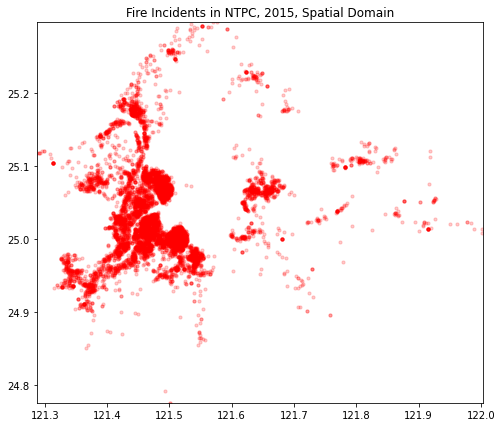

In [17]:
#let's plot the points for 2015
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df15.longitude, df15.latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Fire Incidents in NTPC, 2015, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

(24.77511693, 25.29717505)

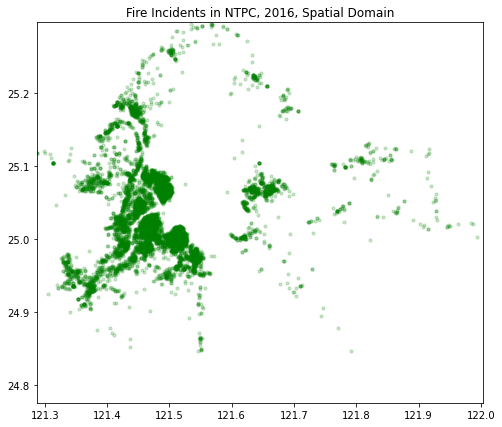

In [18]:
#let's plot the points for 2016
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df16.longitude, df16.latitude, zorder=1, alpha= 0.2, c='g', s=10)
ax.set_title('Fire Incidents in NTPC, 2016, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

(24.77511693, 25.29717505)

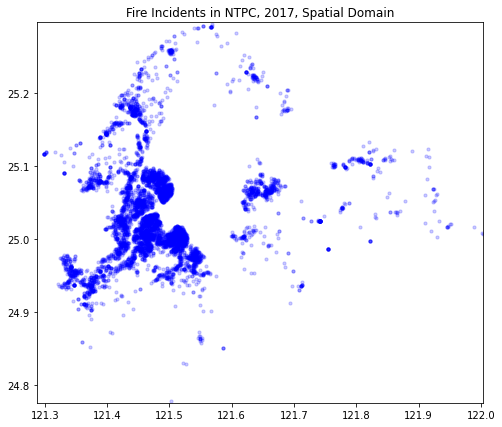

In [19]:
#let's plot the points for 2017
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df17.longitude, df17.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Fire Incidents in NTPC, 2017, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

In [20]:
BBox

(121.2868855, 122.0030709, 24.77511693, 25.29717505)

Generate heatmap cells and convert hotspots to raster data using the "cytogenesis" function

In [21]:
def cytogenesis(df, nc, mapedges):
  #def calculate_cellsize(nc, mapedges):
  def calculate_cellsize():
    global lonmin
    global lonmax
    global latmin
    global latmax
    lonmin = mapedges[0]
    lonmax = mapedges[1]
    latmin = mapedges[2]
    latmax = mapedges[3]
    global csize_lon
    global csize_lat
    csize_lon = (lonmax - lonmin)/nc
    csize_lat = (latmax - latmin)/nc
    #print(csize_lon)
    #print(csize_lat)
    return csize_lon, csize_lat, lonmin, lonmax, latmin, latmax

  #call the 1st subfunction
  #csize_lon, csize_lat = calculate_cellsize(nc, mapedges)
  csize_lon, csize_lat, lonmin, lonmax, latmin, latmax = calculate_cellsize()
  
  #def draw_lines(nc,csize_lon,csize_lat):
  def draw_lines():
    global pixgrade_lon_left
    global pixgrade_lon_right
    global pixgrade_lat_bottom
    global pixgrade_lat_top

    pixgrade_lon_left = np.zeros(nc, dtype="float64")
    pixgrade_lon_right = np.zeros(nc, dtype="float64")
    pixgrade_lat_bottom = np.zeros(nc, dtype="float64")
    pixgrade_lat_top = np.zeros(nc, dtype="float64")
    #draw block boundaries
    for i in range (0,nc,1):

      pixgrade_lon_left[i] = lonmin + ((i)*(csize_lon))
      pixgrade_lon_right[i] = lonmin + ((i+1)*(csize_lon))
      pixgrade_lat_bottom[i] = latmin + ((i)*(csize_lat))
      pixgrade_lat_top[i] = latmin + ((i+1)*(csize_lat))
    
    #print(pixgrade_lon_left)
    #print(pixgrade_lon_right)
    #print(pixgrade_lat_bottom)
    #print(pixgrade_lat_top)
    return pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top

  #pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top = draw_lines(nc,csize_lon,csize_lat)
  pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top = draw_lines()

  #def cell_loader(df, nc, csize_lon, csize_lat, pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top):
  def cell_loader():  
    #create a board
    block = np.zeros((nc, nc), dtype="float32")
    point = np.zeros([len(df),2])

    for i in range (0,len(df),1):
      point[i,0] = df.longitude[i]
      point[i,1] = df.latitude[i]
      #the inner nested loop considers where to place each point into a cell
      for j in range (0,nc,1):
        for k in range (0,nc,1):
          if ((point[i,0] >= pixgrade_lon_left[j]) & (point[i,0] < pixgrade_lon_right[j]) & (point[i,1] >= pixgrade_lat_bottom[k]) & (point[i,1] < pixgrade_lat_top[k])):
            block[j,k] += 1
    #orgaise the cell tablet for proper visualisation
    global bq
    bq = np.rot90(block, k=1)
    bq = bq.astype(np.uint8)

    def heatmap2d(arr: np.ndarray):
      plt.imshow(arr, cmap='viridis')
      plt.colorbar()
      plt.show()

    #heatmap2d(bq)
    return bq

  bq = cell_loader()
  return bq

#cytogenesis(dften, 28, BBox)

In [22]:
def dozenisation(dff, BBox=BBox):

  figtensor = np.zeros([12,28,28])
  for i in range(0,12,1):
    timeframe = (dff['date'].dt.month == i+1)
    df00 = dff.loc[timeframe]
    df00 = df00.reset_index(drop=True)
    df00.head()
    fig0 = cytogenesis(df00, 28, BBox)
    figtensor[i] = fig0
  return figtensor

figtensor15 = dozenisation(df15)
figtensor16 = dozenisation(df16)
figtensor17 = dozenisation(df17)
figtensor = np.concatenate((figtensor15, figtensor16, figtensor17), axis=0)

In [23]:
maxcolour = figtensor.max()
maxcolour

44.0

In [24]:
figtensor.shape

(36, 28, 28)

In [25]:
def ttsplit(dataarray):
  trainarr = np.zeros([24,28,28], dtype='uint8')
  testarr = np.zeros([12,28,28], dtype='uint8')
  j = 0
  k = 0
  for i in range (0, len(dataarray), 1):
    if (i % 3 == 2):
      testarr[j,:,:] = dataarray[i,:,:]
      j+=1
    else:
      trainarr[k,:,:] = dataarray[i,:,:]
      k+=1
  return trainarr, testarr

traindata, testdata = ttsplit(figtensor)

def sigmoid_normalisation(nparray): #In autoencoders, the last (output layer's) activation function is in the decoder
  maxcolour = figtensor.max()      #in this case, it's sigmoid
  #halfbound = float(maxcolour / 2)
  nparray = nparray.astype('float32')
  new_arr = nparray / maxcolour
  return new_arr

trainarray = sigmoid_normalisation(traindata)
testarray = sigmoid_normalisation(testdata)
print(trainarray.shape)
print(testarray.shape)

(24, 28, 28)
(12, 28, 28)


In [26]:
trainarray.shape #check dataset dimensions

(24, 28, 28)

In [27]:
testarray.shape #check dataset dimensions

(12, 28, 28)

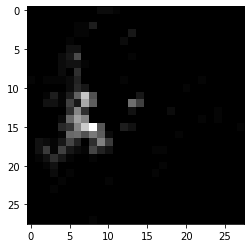

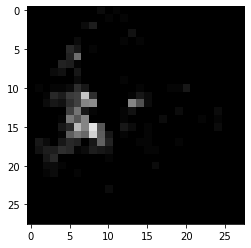

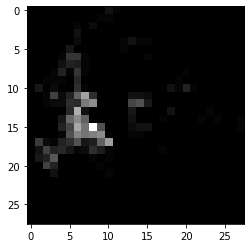

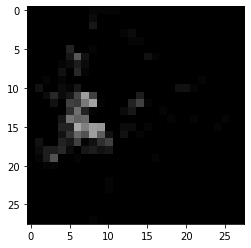

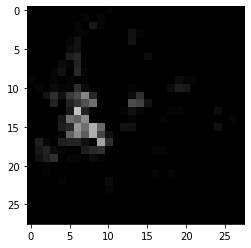

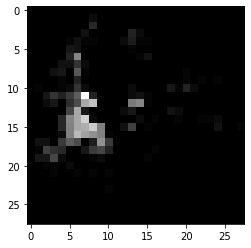

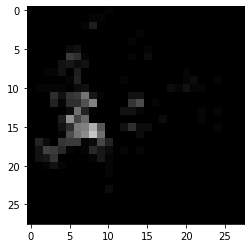

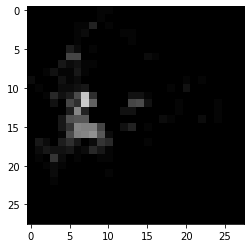

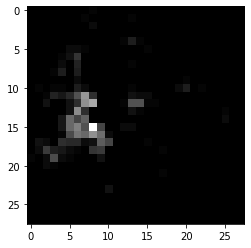

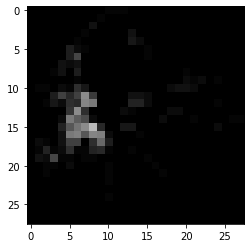

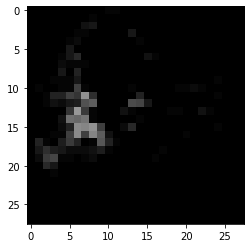

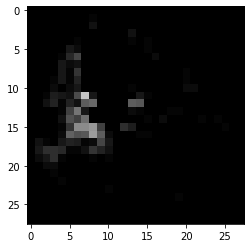

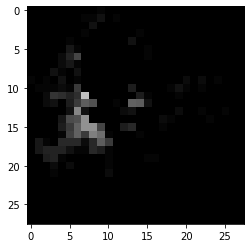

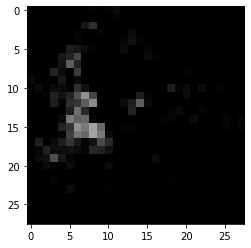

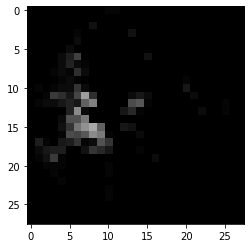

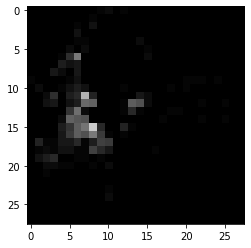

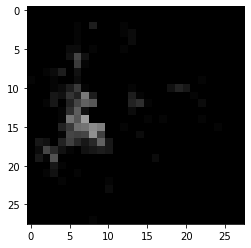

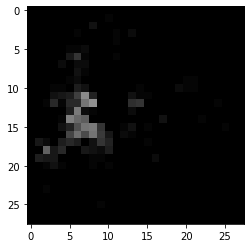

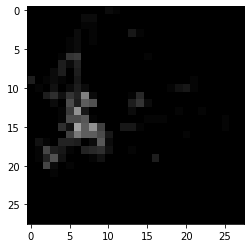

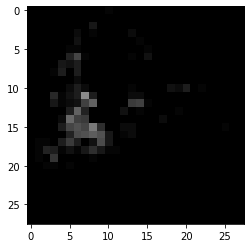

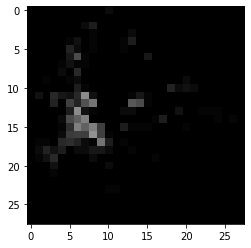

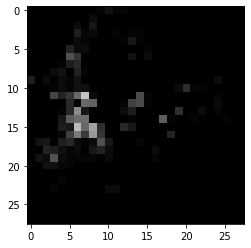

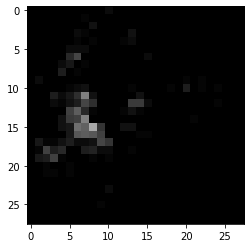

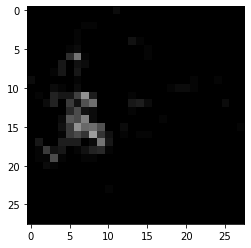

In [28]:
for i in range(0, len(trainarray),1):
  plt.imshow(trainarray[i], cmap='gray', vmin=0, vmax=1)
  plt.show()

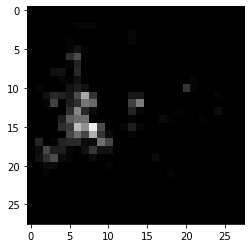

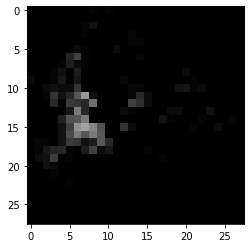

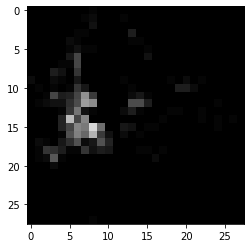

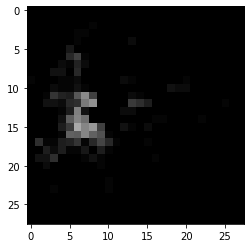

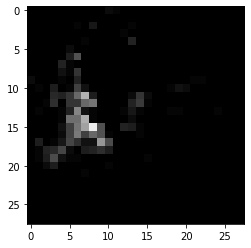

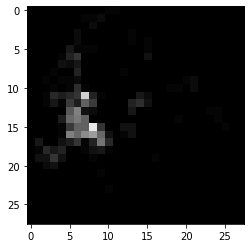

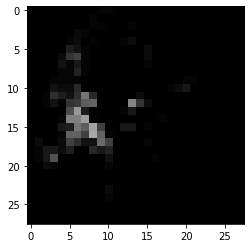

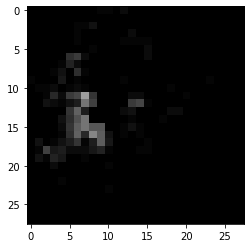

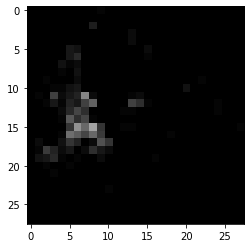

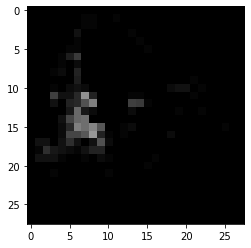

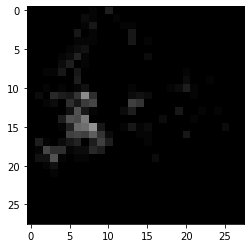

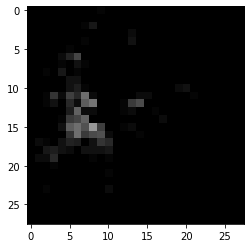

In [29]:
for i in range(0, len(testarray),1):
  plt.imshow(testarray[i], cmap='gray', vmin=0, vmax=1)
  plt.show()

#Data Figure Save
If you do not want to save data, skip this subsection (4 cells below)

In [30]:
'''%mkdir datafig
%cd datafig
%mkdir train
%mkdir test'''

'%mkdir datafig\n%cd datafig\n%mkdir train\n%mkdir test'

In [31]:
'''%cd /content/datafig/train
j = 0
for i in range(0, len(trainarray), 1):
  j+=1
  im = Image.fromarray(trainarray[i])
  im.save("train"+str(j)+".png")'''

'%cd /content/datafig/train\nj = 0\nfor i in range(0, len(trainarray), 1):\n  j+=1\n  im = Image.fromarray(trainarray[i])\n  im.save("train"+str(j)+".png")'

In [32]:
'''%cd /content/datafig/test
j = 0
for i in range(0, len(testarray), 1):
  j+=1
  im = Image.fromarray(trainarray[i])
  im.save("test"+str(j)+".png")'''

'%cd /content/datafig/test\nj = 0\nfor i in range(0, len(testarray), 1):\n  j+=1\n  im = Image.fromarray(trainarray[i])\n  im.save("test"+str(j)+".png")'

In [33]:
#at this step, you need to download the figures in the files console to the left, in order to be used by spatial models.
'''
from google.colab import files
!zip -r /content/datafig.zip /content/datafig
files.download("/content/datafig.zip")
'''

'\nfrom google.colab import files\n!zip -r /content/datafig.zip /content/datafig\nfiles.download("/content/datafig.zip")\n'

#The Spatial Generative Model (Variational-Autoencoder) VAE
Using tensorflow-keras, we need to prepare the data to check its dimensionality before feeding it to a neural network (Variational autoencoder).

**Setup**

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics
from math import sqrt

**Create a sampling layer**

In [35]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

**Encoder**

In [36]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

**Decoder**

In [37]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289 

## Define the VAE as a `Model` with a custom `train_step`

In [38]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            recon = reconstruction
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

## Train the VAE

In [39]:
x_train = trainarray
x_test = testarray

maxcolour = figtensor.max()

In [40]:
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32")

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True )
vae.fit(mnist_digits, epochs=100, batch_size=12)

Epoch 1/100
MSE = 0.23760945
MAE = 0.4829819
MAPE = 425052930.0
1/3 [=========>....................] - ETA: 26s - loss: 545.4104 - reconstruction_loss: 545.4103 - kl_loss: 4.6695e-05MSE = 0.23631546
MAE = 0.4816508
MAPE = 425372540.0
2/3 [===================>..........] - ETA: 0s - loss: 544.7704 - reconstruction_loss: 544.1303 - kl_loss: 1.7296e-04 MSE = 0.23555444
MAE = 0.48113704
MAPE = 425409820.0
3/3 [==============================] - 13s 69ms/step - loss: 543.9194 - reconstruction_loss: 543.0677 - kl_loss: 4.9283e-04
Epoch 2/100
MSE = 0.23406658
MAE = 0.47937644
MAPE = 422613920.0
1/3 [=========>....................] - ETA: 0s - loss: 539.1791 - reconstruction_loss: 539.1771 - kl_loss: 0.0021MSE = 0.23304556
MAE = 0.47838697
MAPE = 423661920.0
2/3 [===================>..........] - ETA: 0s - loss: 538.8051 - reconstruction_loss: 538.4287 - kl_loss: 0.0023MSE = 0.23149288
MAE = 0.47678244
MAPE = 419944300.0
3/3 [==============================] - 0s 69ms/step - loss: 538.0957 - rec

## Display a grid of sampled digits

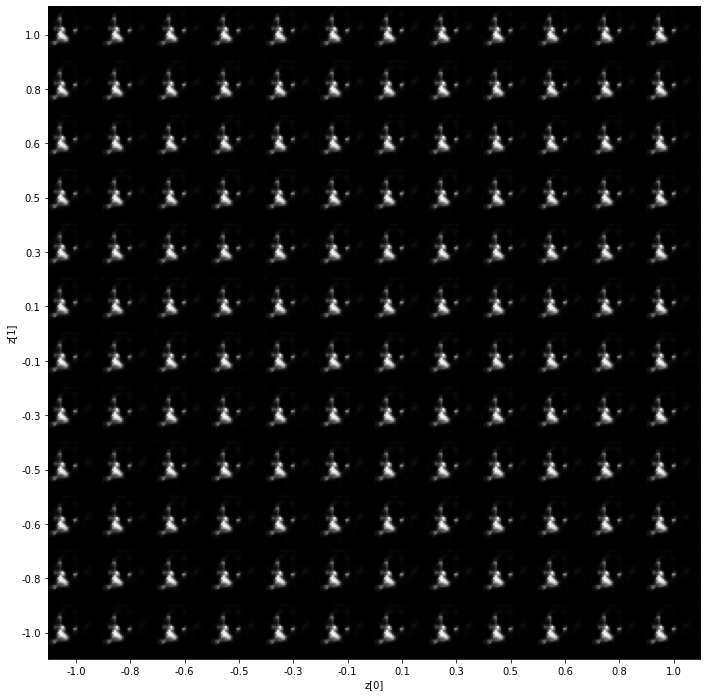

In [41]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=12, figsize=12):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

## Calculate test metrics

In [42]:
def reverse_sigmoid(nparray, maxcolour=figtensor.max()):
  nparray = nparray.astype('float32')
  maxcolour = float(maxcolour)
  new_arr = nparray * maxcolour
  return new_arr

def reverse_tanh(nparray, maxcolour=figtensor.max()):
  nparray = nparray.astype('float32')
  coeff = float(0.5*maxcolour)
  new_arr = (nparray + 1)*(coeff)
  return new_arr

In [43]:
gt = x_test
gt2 = reverse_sigmoid(gt.reshape(12,784))

def prediction(x_test):
  encoded, _, _ = vae.encoder.predict(x_test) #in this model, always drop other 2 tensors before decoding
  decoded = vae.decoder.predict(encoded)
  return decoded

xpred = prediction(x_test)
xpred = xpred.squeeze()
xpred2 = reverse_sigmoid(xpred.reshape(12,784))

mse = metrics.mean_squared_error(gt2, xpred2)
rmse = sqrt(mse)
mae = metrics.mean_absolute_error(gt2, xpred2)
mape = metrics.mean_absolute_percentage_error(gt2, xpred2)

print("Test MSE =", mse)
print("Test RMSE =", rmse)
print("Test MAE =", mae)
print("Test MAPE =", mape)

Test MSE = 1.9275316
Test RMSE = 1.388355718106305
Test MAE = 0.48643875
Test MAPE = 740545040000000.0


In [45]:
gt = x_train
gt2 = reverse_sigmoid(gt.reshape(24,784))

xpred = prediction(x_train)
xpred = xpred.squeeze()
xpred2 = reverse_sigmoid(xpred.reshape(24,784))

mse = metrics.mean_squared_error(gt2, xpred2)
rmse = sqrt(mse)
mae = metrics.mean_absolute_error(gt2, xpred2)
mape = metrics.mean_absolute_percentage_error(gt2, xpred2)

print("Train MSE =", mse)
print("Train RMSE =", rmse)
print("Train MAE =", mae)
print("Train MAPE =", mape)

Train MSE = 2.326788
Train RMSE = 1.525381246970212
Train MAE = 0.5209149
Train MAPE = 733124950000000.0
